In [4]:
import uproot as ur
import mplhep as hep
import numpy as np
import matplotlib.pyplot as plt
import os

In [46]:
os.getcwd()
os.listdir("pileup/")

['PileupReweight_Summer22.root',
 'PileupReweight_Summer22EE.root',
 'PileupReweight_Summer23.root',
 'PileupReweight_Summer23BPix.root',
 'RunII_2016_data.root']

In [28]:
hep.style.use(hep.style.CMS)

In [47]:
def getPUHists(fname):
    with ur.open("pileup/" + fname) as dfile:
        nominal = data_file["npu_nominal"]
        up = data_file["npu_up"]
        down = data_file["npu_down"]
    
    return nominal, up, down

In [56]:
nominal_pu_hists = []
up_pu_hists = []
down_pu_hists = []
    
for file in os.listdir("pileup/"):
    if file[0]=='R':
        continue
    
    ntemp, utemp, dtemp = getPUHists(file)
    nominal_pu_hists.append(ntemp)
    up_pu_hists.append(utemp)
    down_pu_hists.append(dtemp)

In [ ]:
fig, axs = plt.subplots

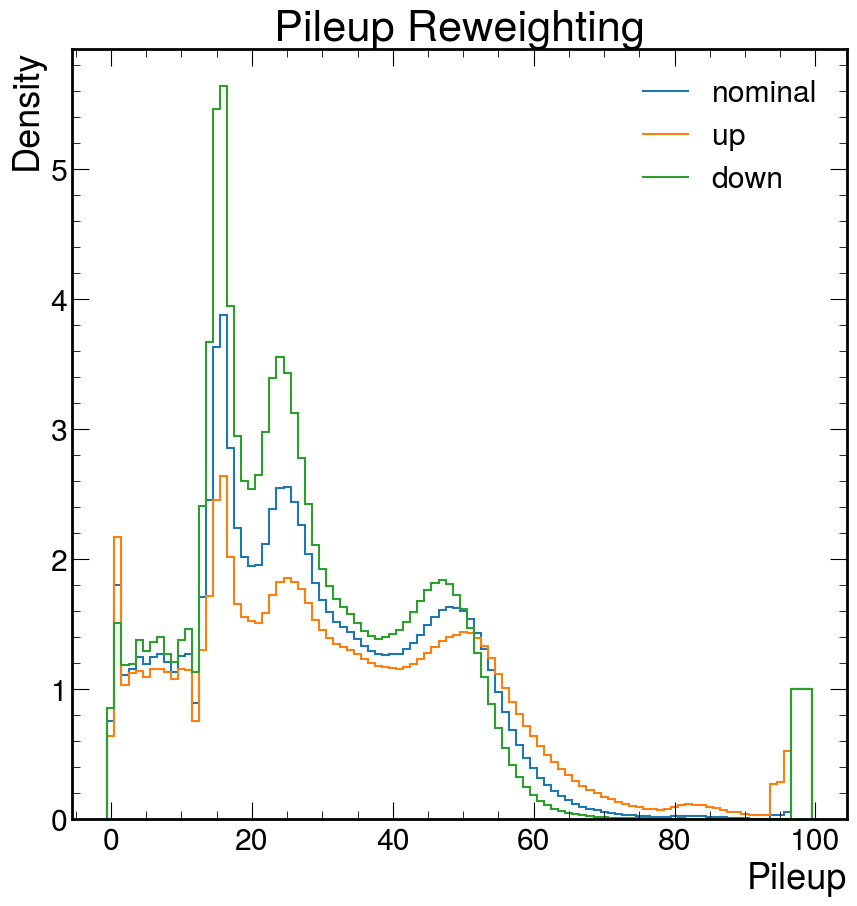

In [42]:
with ur.open("pileup/PileupReweight_Summer23BPix.root") as data_file:
    nominal = data_file["npu_nominal"]
    up = data_file["npu_up"]
    down = data_file["npu_down"]
    #bin_contents, bin_edges = histogram.to_numpy()
    
    fig, axs = plt.subplots()
    hep.histplot(nominal.to_numpy(), label="nominal", ax=axs)
    hep.histplot(up.to_numpy(), label="up", ax=axs)
    hep.histplot(down.to_numpy(), label="down", ax=axs)
    
    axs.legend(frameon=False, loc="upper right", ncols=1)
    axs.set_ylabel("Density")
    axs.set_title("Pileup Reweighting")
    axs.set_xlabel("PU Profile")
    